In [1]:
import pandas as pd

In [13]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [14]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16956,16956,1056,57,Clown pants,"1. i'm 5'5"" tall, 145 lbs, and 38-32-40 and th...",3,1,18,General,Bottoms,Pants
9242,9242,1072,46,"Darling dress, worth the buy now on sale!",I love this dress now that it is on sale; size...,3,1,0,General Petite,Dresses,Dresses
5469,5469,909,81,"Chic and feminine sweater, i love it!","I absolutely love this sweater. it's soft, and...",5,1,0,General,Tops,Fine gauge
11679,11679,830,39,Nice enough,"I liked the top, it is cute, but i didn't keep...",4,1,0,General,Tops,Blouses
7284,7284,862,39,NaN,Great top for day to night. fine for work (i'd...,5,1,0,General,Tops,Knits


In [15]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [23]:
df=df[["Review Text","Rating"]]

In [24]:
df

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [25]:
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

In [26]:
df['sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

C:\Users\kabil\AppData\Local\Temp\ipykernel_9328\4263842708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Rating'].apply(map_rating_to_sentiment)


In [32]:
df["sentiment"].value_counts()

sentiment
positive    18208
neutral      2871
negative     2407
Name: count, dtype: int64

In [38]:
df=df.dropna()

In [43]:
df["sentiment"].value_counts()

sentiment
positive    17448
neutral      2823
negative     2370
Name: count, dtype: int64

In [39]:
X = df['Review Text'].tolist()
y = df['sentiment'].tolist()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [44]:
model = LogisticRegression(multi_class='ovr', max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [45]:
predictions = model.predict(X_test_tfidf)

In [47]:
predictions

array(['positive', 'positive', 'neutral', ..., 'negative', 'positive',
       'positive'], dtype='<U8')

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.60      0.42      0.49       457
     neutral       0.53      0.20      0.29       588
    positive       0.86      0.98      0.91      3484

    accuracy                           0.82      4529
   macro avg       0.66      0.53      0.56      4529
weighted avg       0.79      0.82      0.79      4529



In [50]:
probs = model.predict_proba(X_test_tfidf)

In [51]:
for i, prob in enumerate(probs[:5]):  # Display probabilities for the first 5 test samples
    print(f"Review: {X_test[i]}")
    print(f"Predicted Probabilities: {dict(zip(model.classes_, prob))}")
    print(f"Predicted Sentiment: {predictions[i]}")
    print()

Review: This sweater is so beautiful on. it is thick material, but does not make you look boxy. it fits so nicely and is flattering. the design is just gorgeous. if you are considering this sweater-- get it, you won't regret it!

i'm normally a small (4-6) and i ordered a small. it fits true to size. the fit is *perfect* so if you want it slightly more relaxed, order one size up.
Predicted Probabilities: {'negative': 0.009058413981450351, 'neutral': 0.017258198546503716, 'positive': 0.973683387472046}
Predicted Sentiment: positive

Review: This piece is almost what i want... i tried on the white version in an xs and it felt a little too large for me, even though it's meant to be a looser fit. the buttercup yellow behind the lace is very pretty - i especially love that part of this tank. it provides a nice contrast and allows the detail to stand out. the navy is also nice (it was on display next to the white and looks better in person than online). what i didn't like was the texture of 

In [52]:
input_review = "the dress really good but the color is not good at all"

In [53]:
input_review_tfidf = vectorizer.transform([input_review])

In [54]:
predicted_sentiment = model.predict(input_review_tfidf)[0]

In [55]:
predicted_probabilities = model.predict_proba(input_review_tfidf)[0]

In [56]:
print(f"Review: {input_review}")
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Predicted Probabilities: {dict(zip(model.classes_, predicted_probabilities))}")

Review: the dress really good but the color is not good at all
Predicted Sentiment: positive
Predicted Probabilities: {'negative': 0.22934165973408632, 'neutral': 0.19521364852738315, 'positive': 0.5754446917385305}


In [58]:
import matplotlib.pyplot as plt

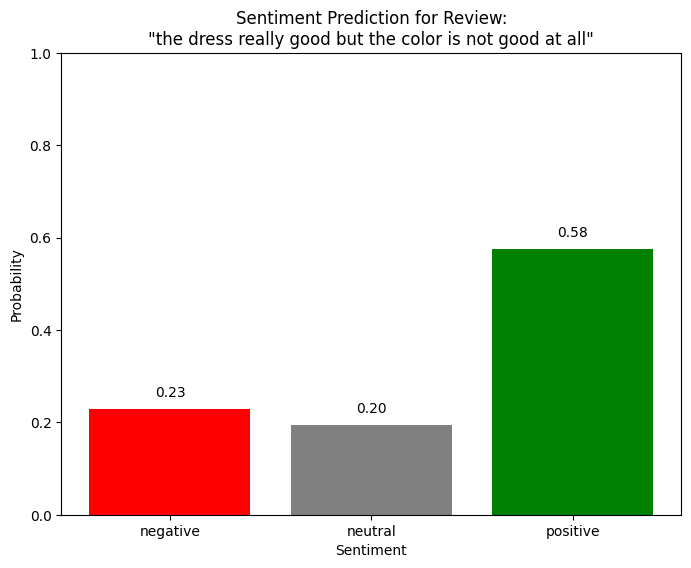

In [59]:
def plot_predictions(review, probabilities, classes):
    plt.figure(figsize=(8, 6))
    plt.bar(classes, probabilities, color=['red', 'gray', 'green'])
    plt.xlabel('Sentiment')
    plt.ylabel('Probability')
    plt.title(f'Sentiment Prediction for Review:\n"{review}"')
    plt.ylim(0, 1)
    for i, prob in enumerate(probabilities):
        plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center', va='bottom')
    plt.show()

plot_predictions(input_review, predicted_probabilities, model.classes_)

In [61]:
import joblib

In [62]:
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

Review: the dress really good but the color is not good at all
Predicted Sentiment: positive
Predicted Probabilities: {'negative': 0.22934165973408632, 'neutral': 0.19521364852738315, 'positive': 0.5754446917385305}


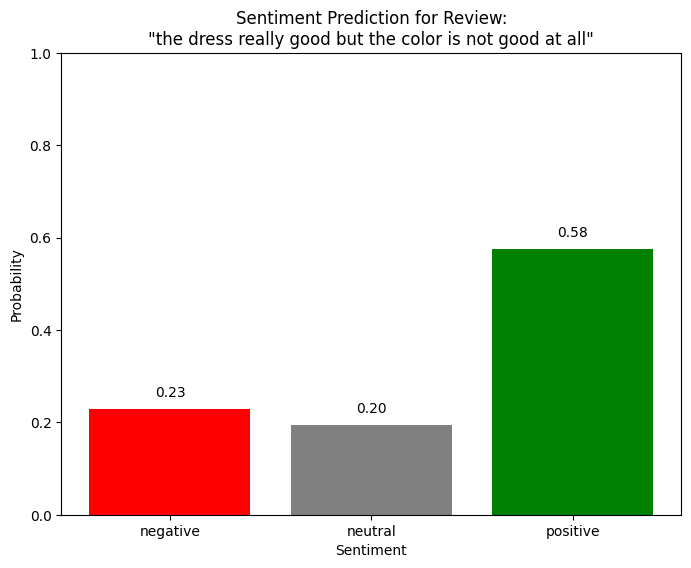

In [63]:

import joblib
import matplotlib.pyplot as plt


model = joblib.load('sentiment_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

input_review = "the dress really good but the color is not good at all"

input_review_tfidf = vectorizer.transform([input_review])

predicted_sentiment = model.predict(input_review_tfidf)[0]

predicted_probabilities = model.predict_proba(input_review_tfidf)[0]

print(f"Review: {input_review}")
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Predicted Probabilities: {dict(zip(model.classes_, predicted_probabilities))}")


def plot_predictions(review, probabilities, classes):
    plt.figure(figsize=(8, 6))
    plt.bar(classes, probabilities, color=['red', 'gray', 'green'])
    plt.xlabel('Sentiment')
    plt.ylabel('Probability')
    plt.title(f'Sentiment Prediction for Review:\n"{review}"')
    plt.ylim(0, 1)
    for i, prob in enumerate(probabilities):
        plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center', va='bottom')
    plt.show()

plot_predictions(input_review, predicted_probabilities, model.classes_)
